# AR

In [43]:
from pandas import Series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
series = Series.from_csv('D:\\Dropbox\\szkolenia\\time_series\\daily-minimum-temperatures.csv', header=0)
series.head()

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Daily minimum temperatures in Melbourne, Australia, 1981-1990, dtype: float64

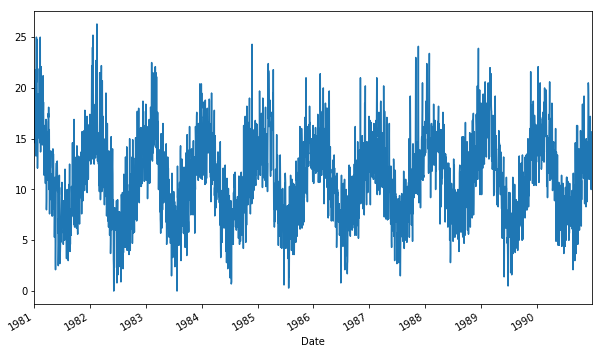

In [45]:
plt.figure(figsize=(10,6));
series.plot()
plt.show()

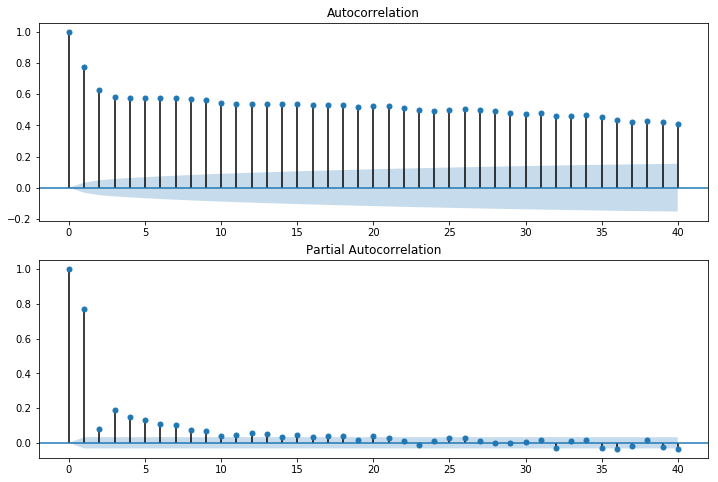

In [46]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(series.values, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(series.values, lags=40, ax=ax2)
plt.show()

# Autoregression Model

In [47]:
from statsmodels.tsa.ar_model import AR

In [48]:
X = series.values
train, test = X[1:len(X)-2000], X[len(X)-2001:]

In [49]:
#trainS=pd.Series(np.stack(predictions,1)[0], index=data['1955-05-01':'1960-05-01'].index)
rng1 =pd.date_range(series.index[5], periods=len(X)-2001, freq='D')
trainS=pd.Series(train, index=rng1)
rng2 =pd.date_range(series.index[len(X)-2001], periods=2001, freq='D')
testS=pd.Series(test,index=rng2)
print(rng1)
print(rng2)

DatetimeIndex(['1981-01-06', '1981-01-07', '1981-01-08', '1981-01-09',
               '1981-01-10', '1981-01-11', '1981-01-12', '1981-01-13',
               '1981-01-14', '1981-01-15',
               ...
               '1985-06-30', '1985-07-01', '1985-07-02', '1985-07-03',
               '1985-07-04', '1985-07-05', '1985-07-06', '1985-07-07',
               '1985-07-08', '1985-07-09'],
              dtype='datetime64[ns]', length=1646, freq='D')
DatetimeIndex(['1985-07-09', '1985-07-10', '1985-07-11', '1985-07-12',
               '1985-07-13', '1985-07-14', '1985-07-15', '1985-07-16',
               '1985-07-17', '1985-07-18',
               ...
               '1990-12-21', '1990-12-22', '1990-12-23', '1990-12-24',
               '1990-12-25', '1990-12-26', '1990-12-27', '1990-12-28',
               '1990-12-29', '1990-12-30'],
              dtype='datetime64[ns]', length=2001, freq='D')


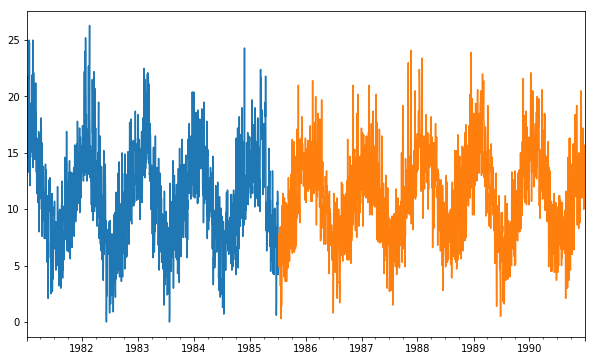

In [50]:
plt.figure(figsize=(10,6));
trainS.ix['1980':].plot()
testS.plot()
plt.show()

In [51]:
print(len(train))
print(len(test))

1646
2001


In [13]:
model = AR(train)

In [14]:
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 24
Coefficients: [ 0.56691302  0.59994965 -0.10440545  0.07574033  0.01920208  0.06170042
 -0.00326916  0.0512316   0.04582641  0.04371274 -0.01187314 -0.00544799
  0.02191693 -0.00421037  0.06195737 -0.03541854  0.02606062 -0.02014342
  0.03647476  0.0345772   0.00450259  0.02305056  0.00735589  0.00235868
  0.01509072]


In [15]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

In [16]:
from sklearn.metrics import mean_squared_error
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=7.738295, expected=7.500000
predicted=7.747052, expected=4.900000
predicted=7.343110, expected=5.900000
predicted=7.097824, expected=7.800000
predicted=7.093936, expected=5.800000
predicted=7.389590, expected=7.000000
predicted=7.692920, expected=8.400000
predicted=7.955183, expected=6.200000
predicted=7.893243, expected=7.500000
predicted=7.960929, expected=4.800000
predicted=8.182984, expected=3.300000
predicted=8.281968, expected=3.200000
predicted=8.449309, expected=7.000000
predicted=8.281219, expected=8.400000
predicted=8.154464, expected=0.300000
predicted=8.055823, expected=0.300000
predicted=8.002211, expected=2.100000
predicted=8.031101, expected=8.500000
predicted=8.030902, expected=1.400000
predicted=8.078643, expected=4.100000
predicted=8.121020, expected=10.300000
predicted=8.144461, expected=6.600000
predicted=8.155071, expected=6.100000
predicted=8.157473, expected=7.000000
predicted=8.184450, expected=5.100000
predicted=8.220490, expected=6.300000
predicted=8

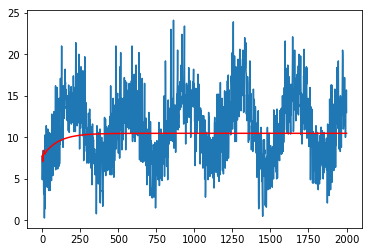

In [17]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# pandas

In [18]:
model = AR(trainS)
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 24
Coefficients: [ 0.56691302  0.59994965 -0.10440545  0.07574033  0.01920208  0.06170042
 -0.00326916  0.0512316   0.04582641  0.04371274 -0.01187314 -0.00544799
  0.02191693 -0.00421037  0.06195737 -0.03541854  0.02606062 -0.02014342
  0.03647476  0.0345772   0.00450259  0.02305056  0.00735589  0.00235868
  0.01509072]


In [19]:
model_fit = model.fit()

In [20]:
testS.index

DatetimeIndex(['1985-07-09', '1985-07-10', '1985-07-11', '1985-07-12',
               '1985-07-13', '1985-07-14', '1985-07-15', '1985-07-16',
               '1985-07-17', '1985-07-18',
               ...
               '1990-12-21', '1990-12-22', '1990-12-23', '1990-12-24',
               '1990-12-25', '1990-12-26', '1990-12-27', '1990-12-28',
               '1990-12-29', '1990-12-30'],
              dtype='datetime64[ns]', length=2001, freq='D')

In [22]:
predictions = model_fit.predict(start='1985-07-09',end='1990-12-30', dynamic=True)
predictions

D:\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


1985-07-09     8.164979
1985-07-10     8.137249
1985-07-11     7.916977
1985-07-12     7.453769
1985-07-13     7.189459
1985-07-14     7.198919
1985-07-15     7.477094
1985-07-16     7.786770
1985-07-17     8.069249
1985-07-18     8.021870
1985-07-19     8.064157
1985-07-20     8.255817
1985-07-21     8.357122
1985-07-22     8.520817
1985-07-23     8.386297
1985-07-24     8.238178
1985-07-25     8.135671
1985-07-26     8.069439
1985-07-27     8.111722
1985-07-28     8.137661
1985-07-29     8.181042
1985-07-30     8.226856
1985-07-31     8.249380
1985-08-01     8.254479
1985-08-02     8.257864
1985-08-03     8.278814
1985-08-04     8.310957
1985-08-05     8.352570
1985-08-06     8.370820
1985-08-07     8.399684
                ...    
1990-12-01    10.486826
1990-12-02    10.486826
1990-12-03    10.486826
1990-12-04    10.486826
1990-12-05    10.486826
1990-12-06    10.486826
1990-12-07    10.486826
1990-12-08    10.486826
1990-12-09    10.486826
1990-12-10    10.486826
1990-12-11    10

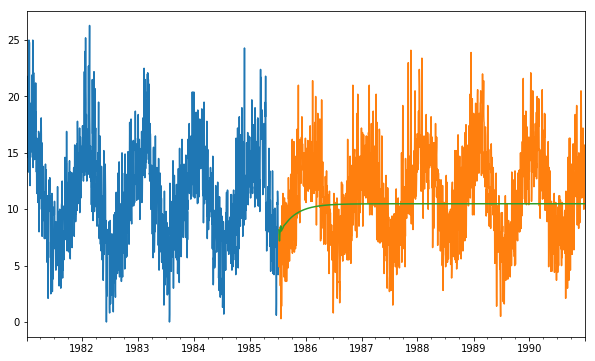

In [26]:
plt.figure(figsize=(10,6));
trainS.ix['1980':].plot()
testS.plot()
predictions.plot()
plt.show()

In [37]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = AR(history)
    model_fit = model.fit(disp=0)
    output = model_fit.predict(start=len(history), end=(len(history)+1))
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=7.738295, expected=7.500000
predicted=7.602570, expected=4.900000
predicted=5.641968, expected=5.900000
predicted=6.505617, expected=7.800000
predicted=7.452119, expected=5.800000
predicted=6.353841, expected=7.000000
predicted=7.446543, expected=8.400000
predicted=8.251573, expected=6.200000
predicted=6.598147, expected=7.500000
predicted=7.663741, expected=4.800000
predicted=6.029706, expected=3.300000
predicted=5.589981, expected=3.200000
predicted=5.500996, expected=7.000000
predicted=7.376267, expected=8.400000
predicted=7.602015, expected=0.300000
predicted=2.596745, expected=0.300000
predicted=3.532280, expected=2.100000
predicted=4.224756, expected=8.500000
predicted=7.508639, expected=1.400000
predicted=2.342885, expected=4.100000
predicted=5.498982, expected=10.300000
predicted=8.390430, expected=6.600000
predicted=5.725110, expected=6.100000
predicted=5.295464, expected=7.000000
predicted=6.747761, expected=5.100000
predicted=5.636402, expected=6.300000
predicted=6

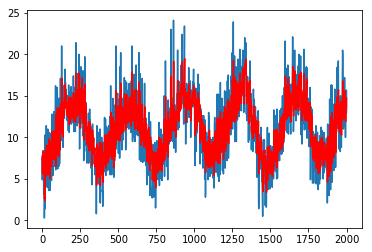

In [38]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

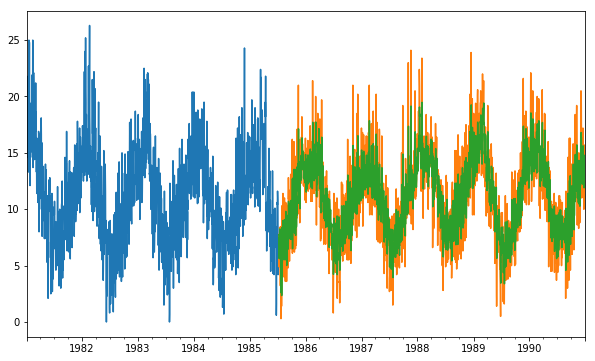

In [40]:
pre=pd.Series(predictions, index=testS.index)

plt.figure(figsize=(10,6));
trainS.ix['1950':].plot()
testS.plot()
pre.plot()
plt.show()

predicted=7.738295, expected=7.500000
predicted=7.604087, expected=4.900000
predicted=5.659902, expected=5.900000
predicted=6.511230, expected=7.800000
predicted=7.445662, expected=5.800000
predicted=6.361309, expected=7.000000
predicted=7.444866, expected=8.400000
predicted=8.243610, expected=6.200000
predicted=6.603307, expected=7.500000
predicted=7.657376, expected=4.800000
predicted=6.036691, expected=3.300000
predicted=5.601762, expected=3.200000
predicted=5.531487, expected=7.000000
predicted=7.393171, expected=8.400000
predicted=7.607208, expected=0.300000
predicted=2.628348, expected=0.300000
predicted=3.563671, expected=2.100000
predicted=4.261306, expected=8.500000
predicted=7.517336, expected=1.400000
predicted=2.405120, expected=4.100000
predicted=5.544736, expected=10.300000
predicted=8.433630, expected=6.600000
predicted=5.786903, expected=6.100000
predicted=5.325826, expected=7.000000
predicted=6.738679, expected=5.100000
predicted=5.691595, expected=6.300000
predicted=6

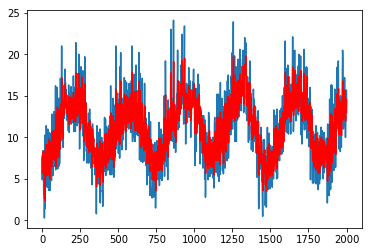

In [41]:
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

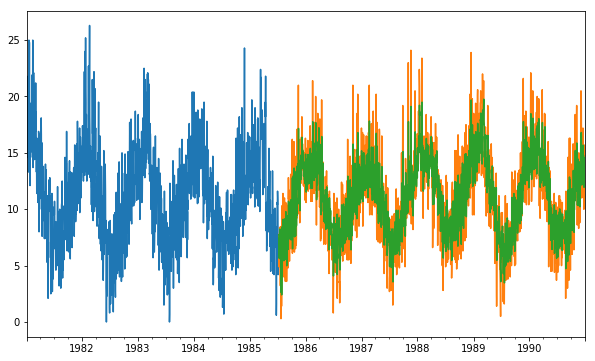

In [42]:
pre=pd.Series(predictions, index=testS.index)

plt.figure(figsize=(10,6));
trainS.ix['1950':].plot()
testS.plot()
pre.plot()
plt.show()